In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
column_names = [
    "access difference",
    "gini difference (TPDD)",
    "gini difference (property price)",
    "available amenity categoies",
    "gini in 15-min walk area",
    "area difference",
    "ellipticity",
    "distance from city center",
]

In [4]:
bud = pd.read_csv("../output/regression/bud_for_corrplot.csv")
hel = pd.read_csv("../output/regression/hel_for_corrplot.csv")
mad = pd.read_csv("../output/regression/mad_for_corrplot.csv")

In [ ]:
# [column_names[0]] + column_names[3:]


In [56]:
def plot_correlation_mx(corr: pd.DataFrame) -> tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots(layout="constrained", dpi=300)
    mask = np.tril(np.ones_like(corr, dtype=bool))
    sns.heatmap(
        corr,
        mask=mask,
        cmap="RdYlBu_r",
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        vmax=1,
        vmin=-1,
        ax=ax,
    )
    _ = ax.set_xticks(
        ax.get_xticks(),
        ax.get_xticklabels(),
        rotation=30,
        ha="right",
        # rotation_mode="anchor",
    )
    return fig, ax

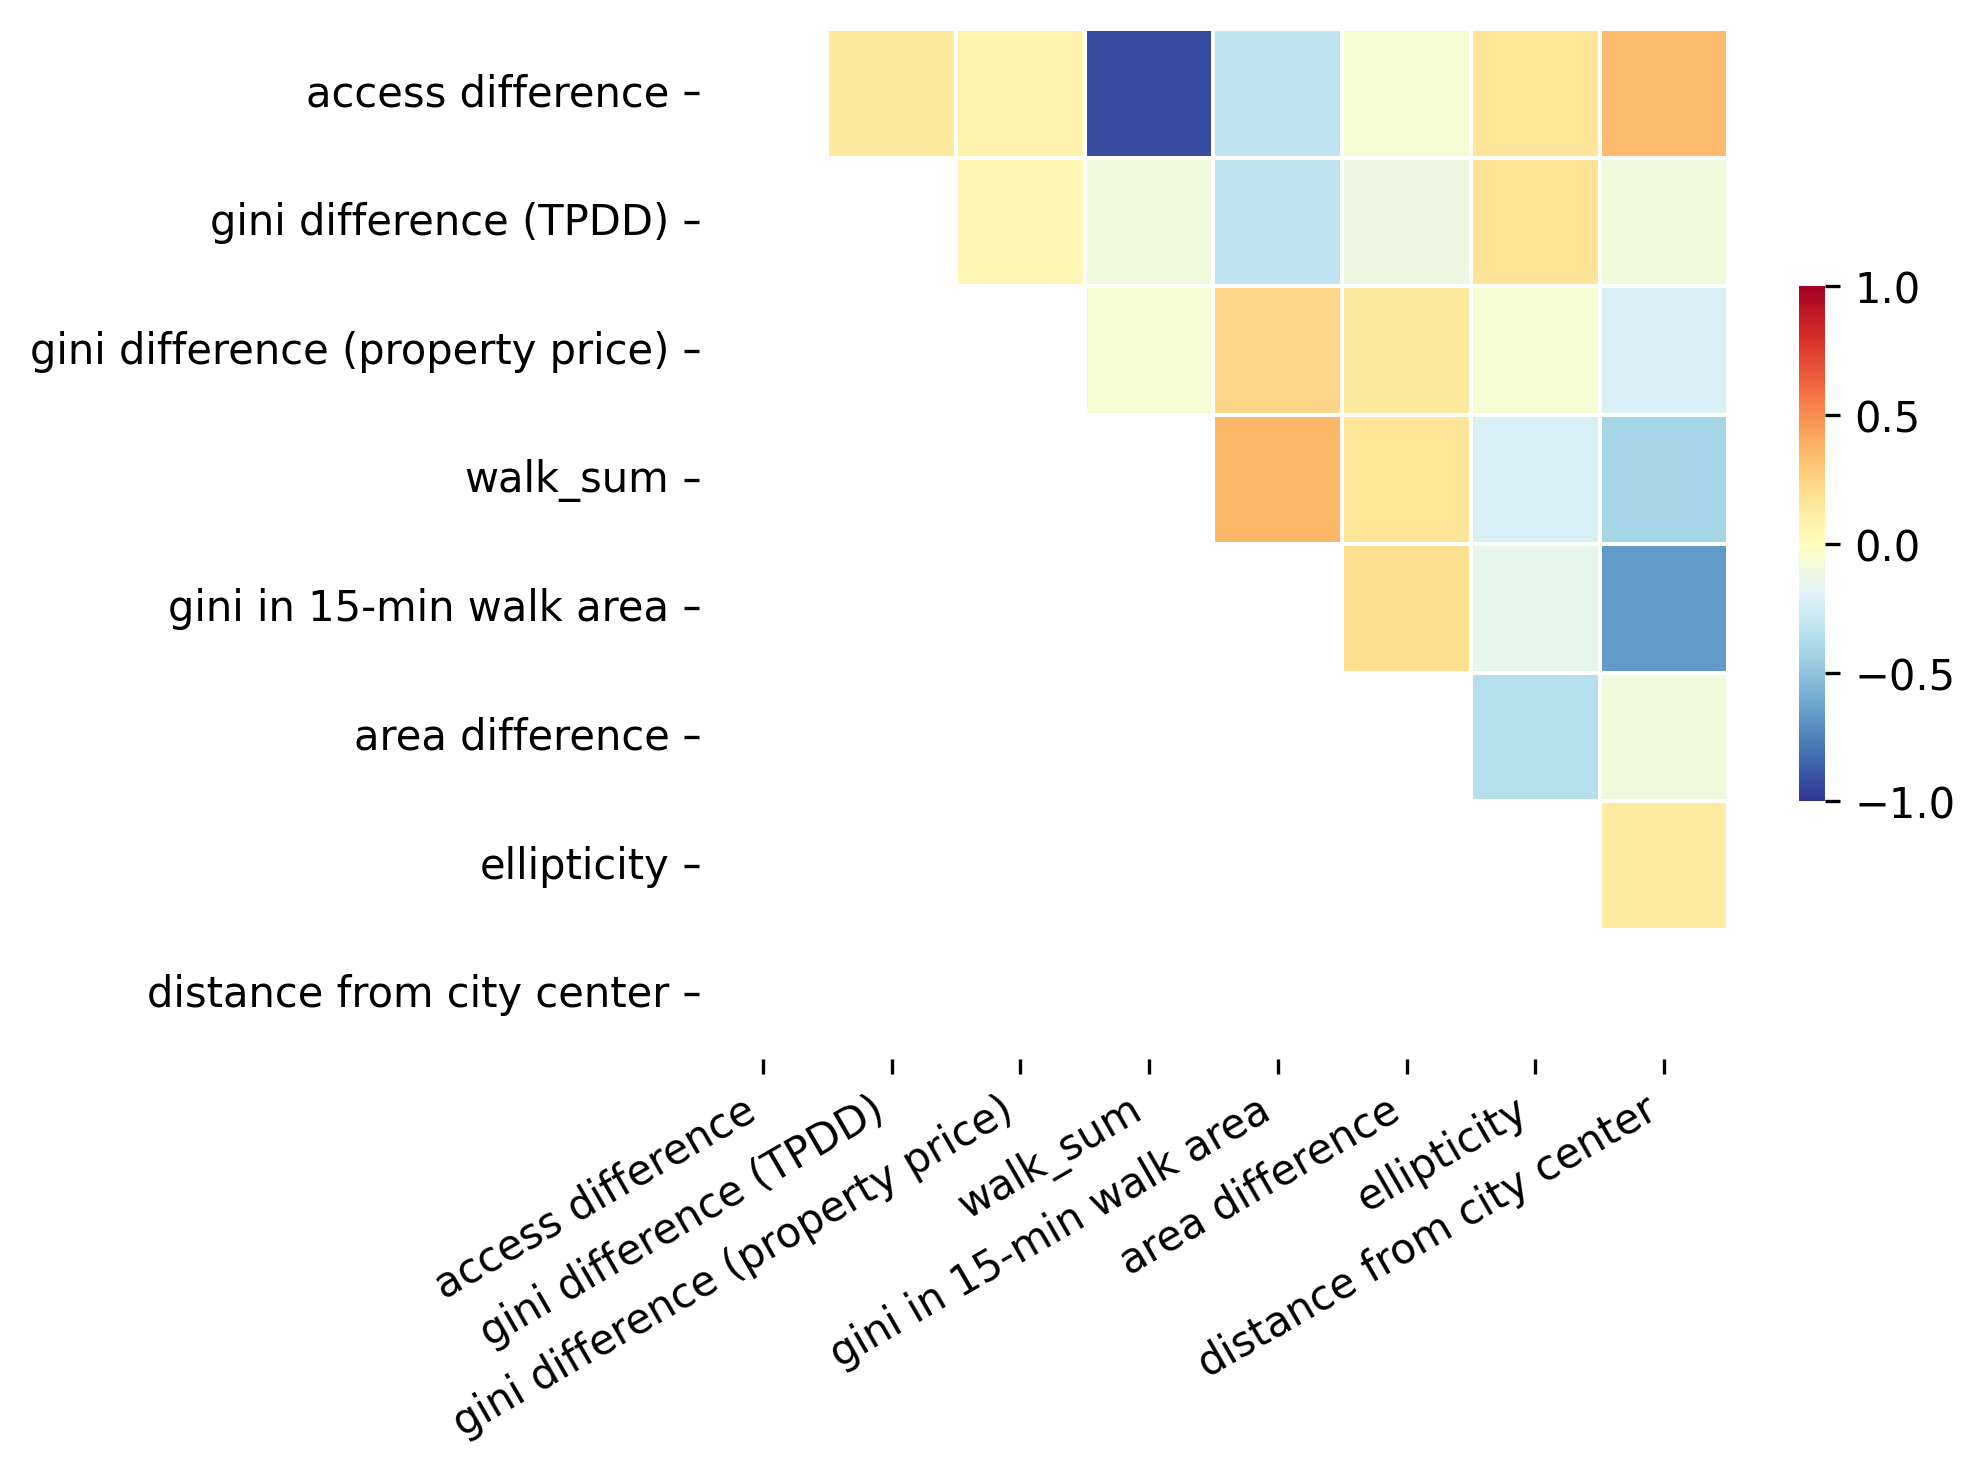

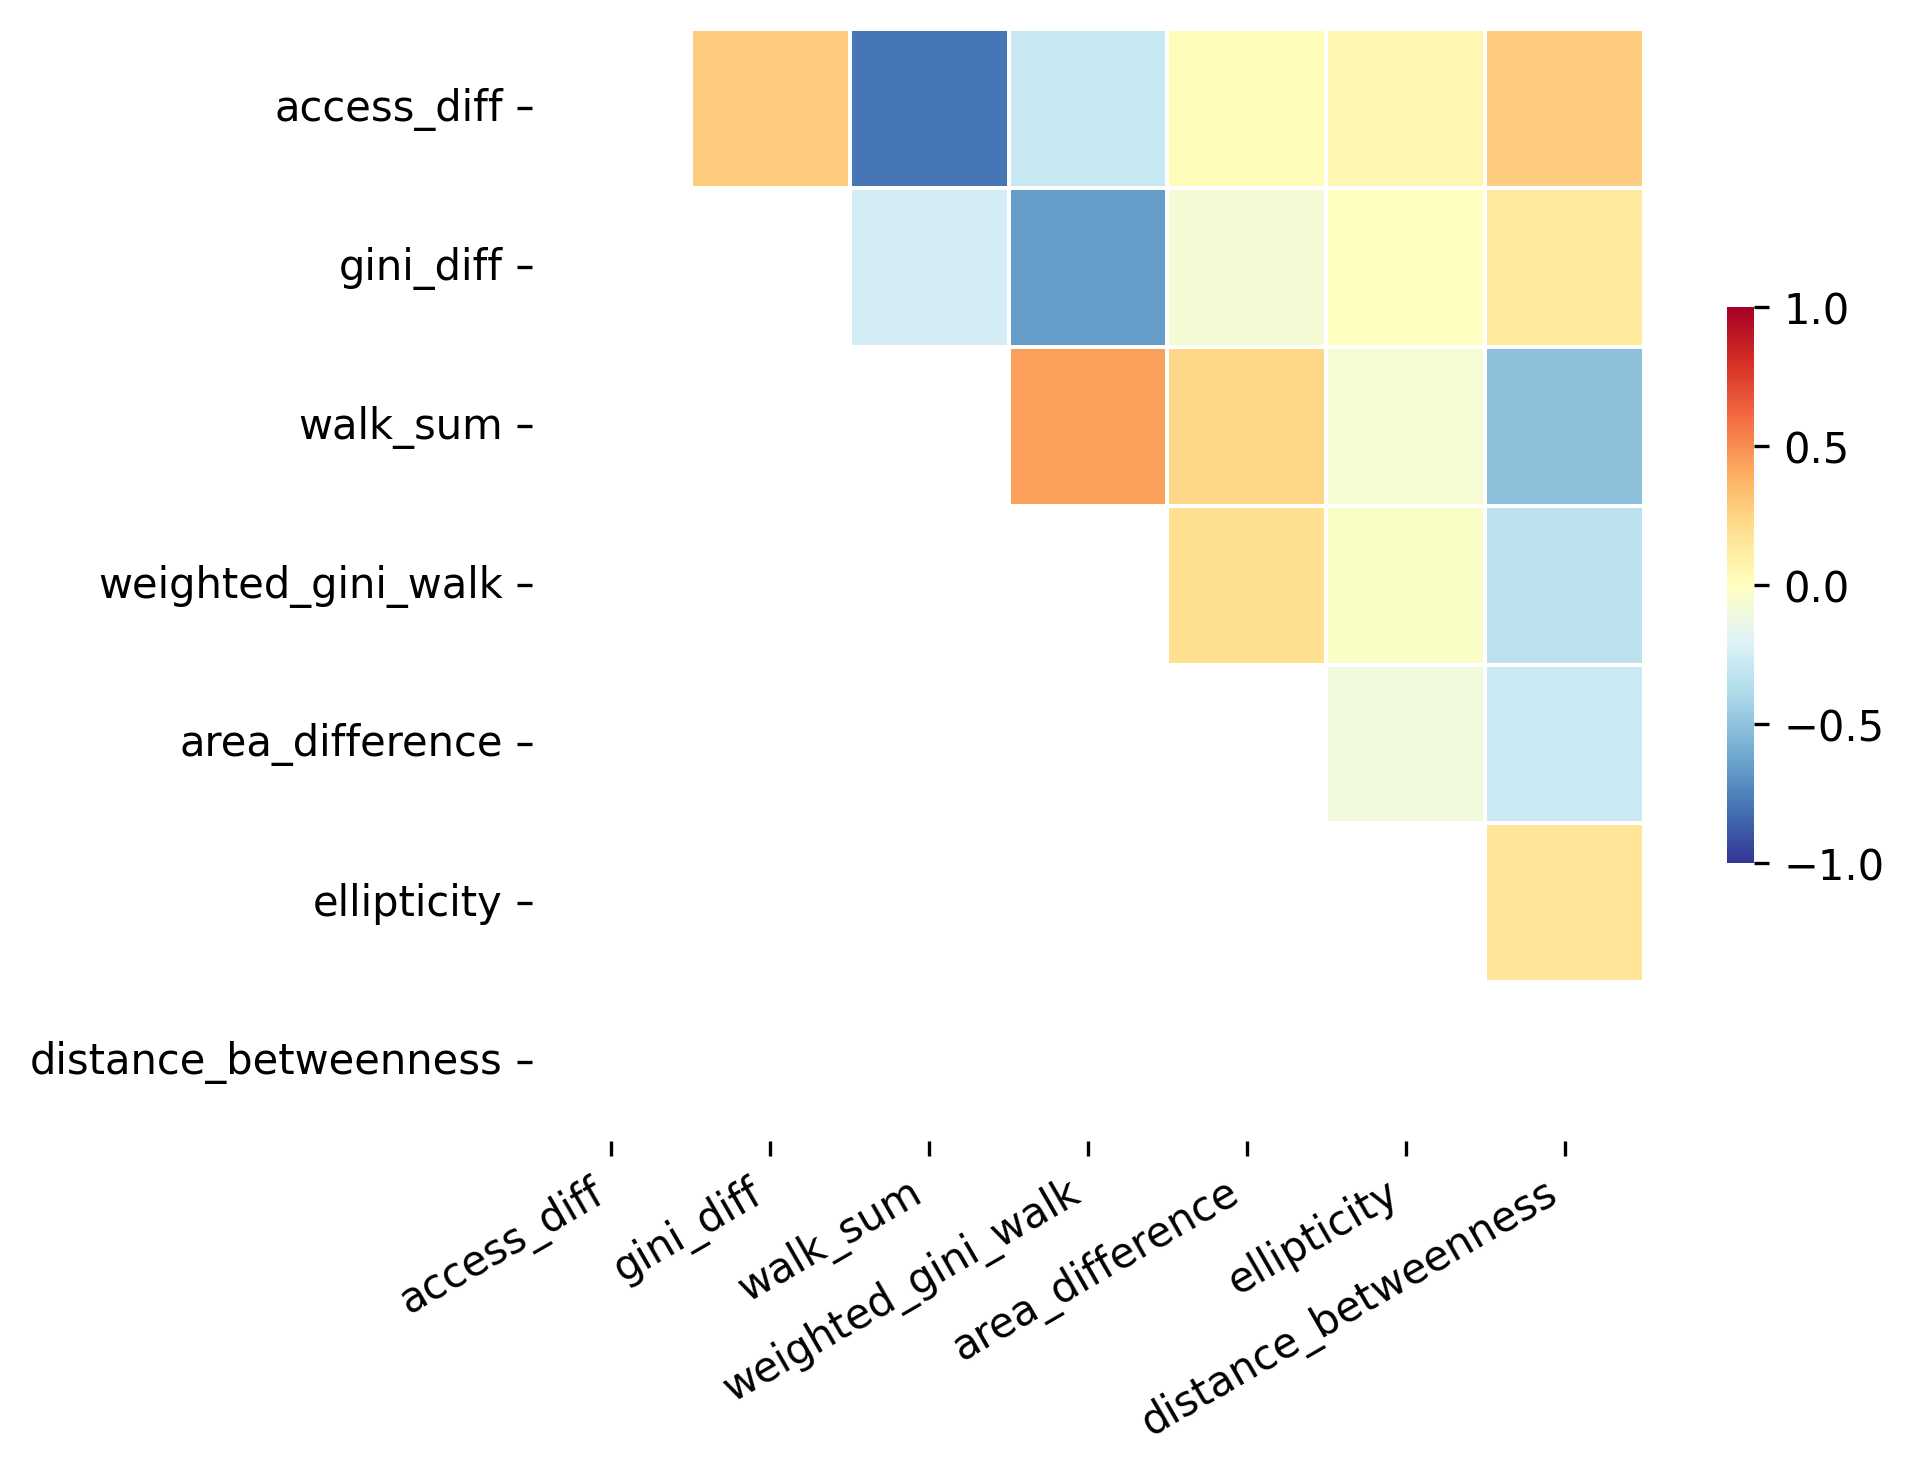

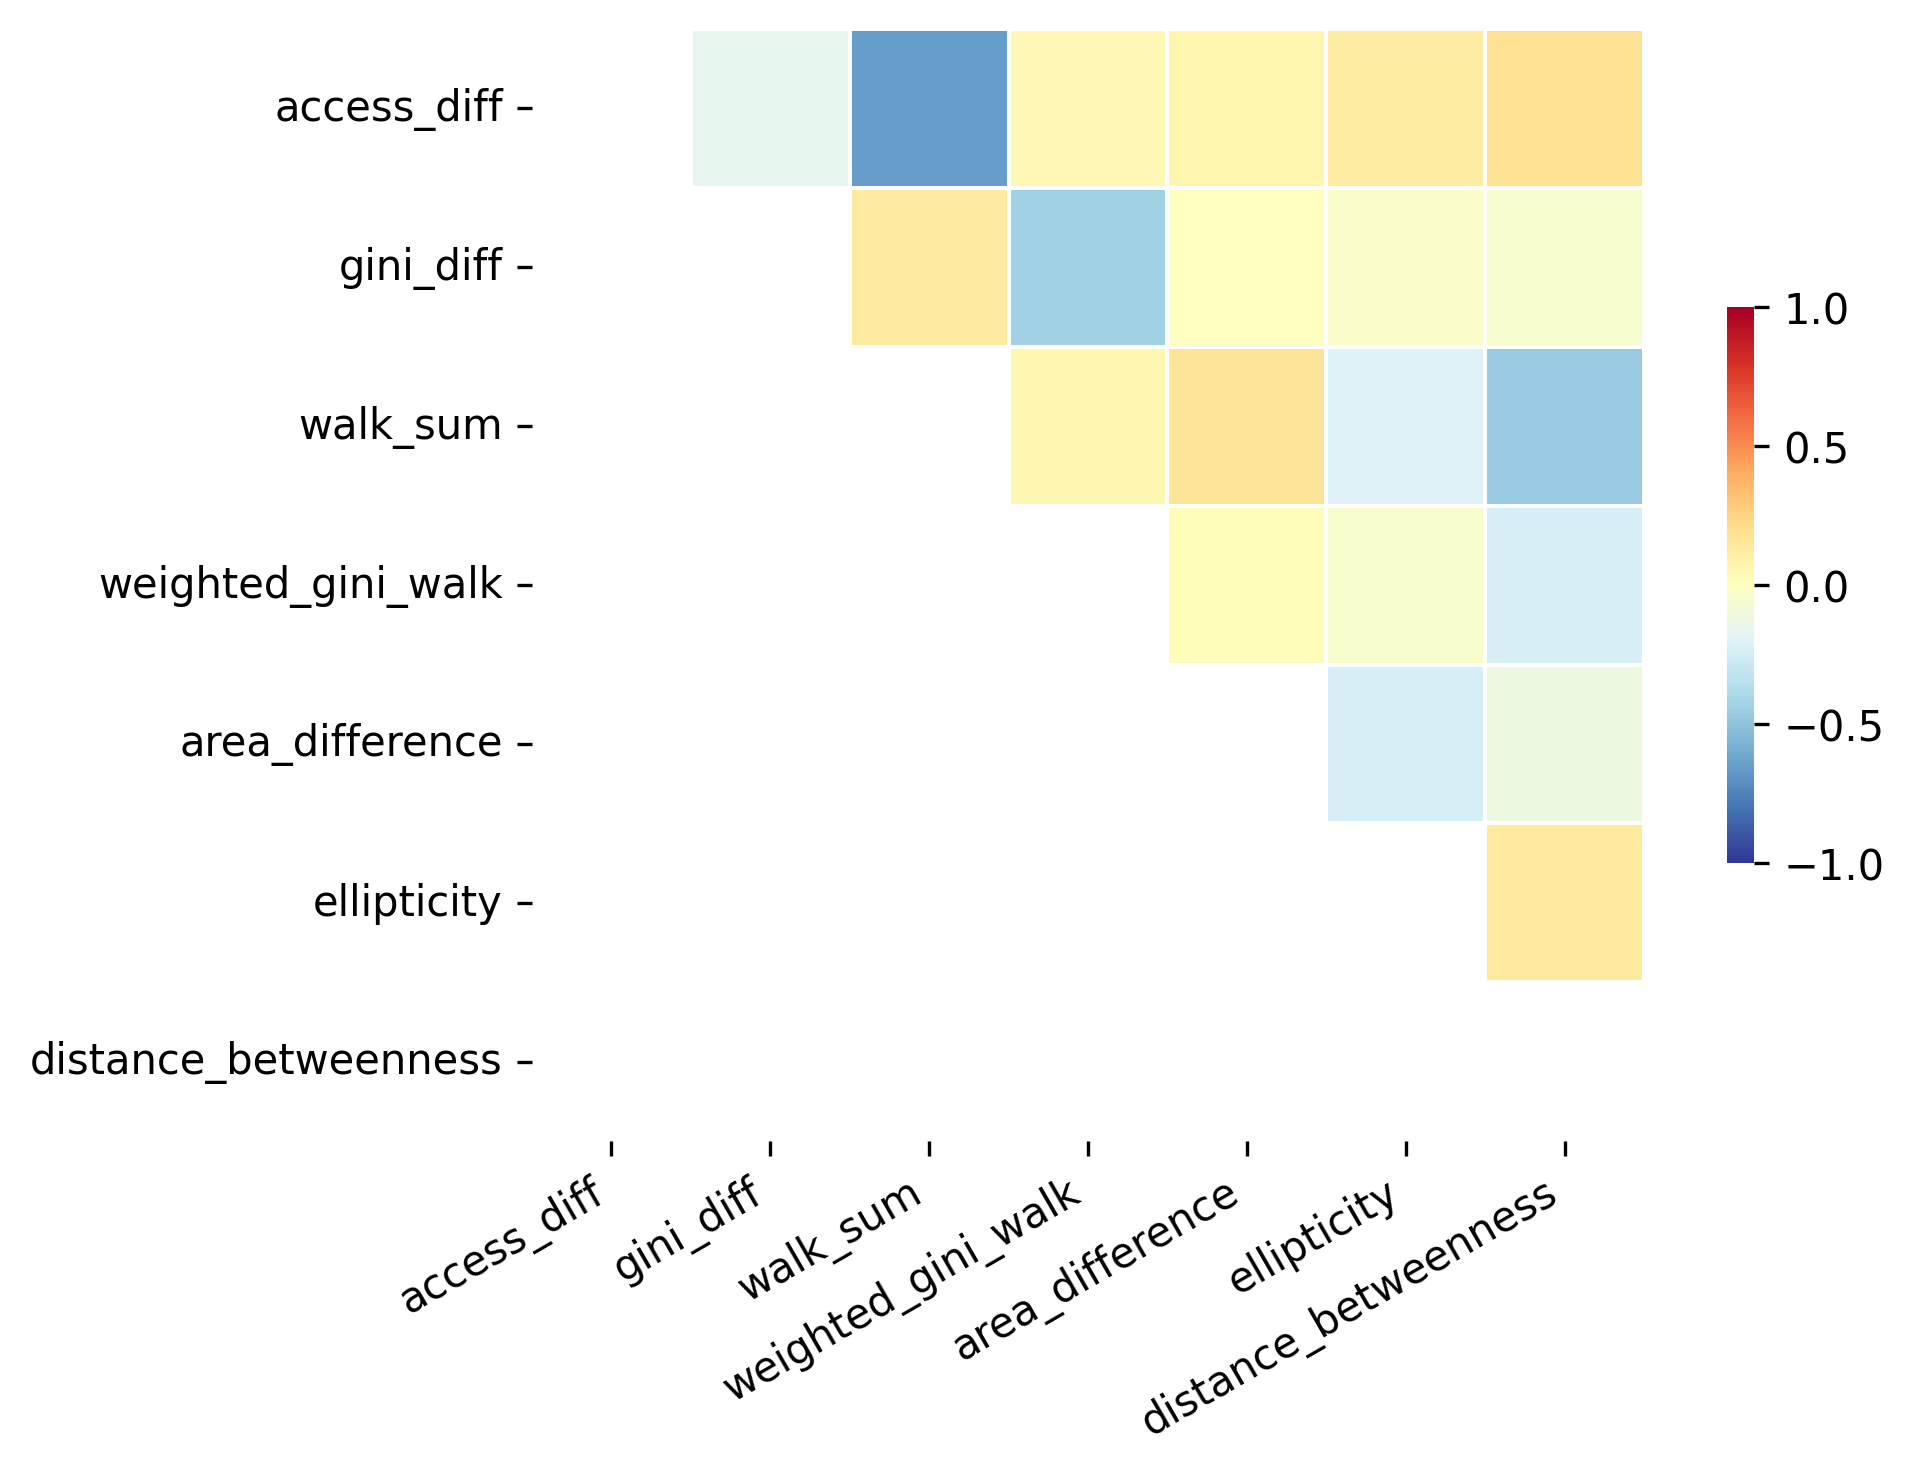

In [57]:
for city, name in zip([bud, hel, mad], ["bud", "hel", "mad"]):
    fig, _ = plot_correlation_mx(city.corr())
    for i in ["png", "pdf"]:
        fig.savefig(f"../output/regression/{name}_corrplot.{i}")